<a href="https://colab.research.google.com/github/saileshraturi/CNN-over-CIFAR10/blob/master/CNN_over_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input,Conv2D,Dense,Flatten,Dropout
from tensorflow.keras.models import Model

In [0]:
CIFAR10 = tf.keras.datasets.cifar10

In [3]:
(x_train,y_train),(x_test,y_test) = CIFAR10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [4]:
print(x_train.shape)

(50000, 32, 32, 3)


In [5]:
x_train,x_test = x_train/255.0,x_test/255.0
y_train,y_test = y_train.flatten(),y_test.flatten()
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000,)


In [7]:
#total labels

k = len(set(y_train))
print(k)


10


In [0]:
#Build the model
i = Input(x_train[0].shape)
x = Conv2D(32, (3,3),strides = 2,activation='relu')(i)
x = Conv2D(64,(3,3),strides=2,activation='relu')(x)
x = Conv2D(128,(3,3),strides=2,activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(k,activation='softmax')(x)

model = Model(i,x)

In [9]:
#compile and fit the model

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
r = model.fit(x_train,y_train, validation_data=(x_test,y_test),epochs = 15)

Epoch 1/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5133 - accuracy: 0.4473 - val_loss: 1.2213 - val_accuracy: 0.5621
Epoch 2/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1811 - accuracy: 0.5788 - val_loss: 1.0768 - val_accuracy: 0.6153
Epoch 3/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0232 - accuracy: 0.6348 - val_loss: 1.0020 - val_accuracy: 0.6415
Epoch 4/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9026 - accuracy: 0.6782 - val_loss: 0.9491 - val_accuracy: 0.6616
Epoch 5/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7983 - accuracy: 0.7161 - val_loss: 0.8976 - val_accuracy: 0.6815
Epoch 6/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7121 - accuracy: 0.7477 - val_loss: 0.8688 - val_accuracy: 0.6957
Epoch 7/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6299 - accuracy: 0.7767 - val_loss: 0.8686 - val_accuracy:

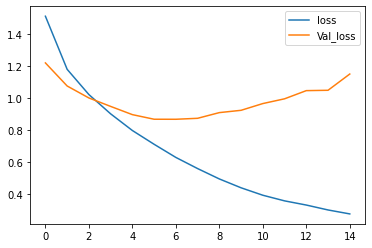

In [11]:
#Visualizing Loss and accuracy
plt.plot(r.history['loss'],label ='loss')
plt.plot(r.history['val_loss'],label = 'Val_loss')
plt.legend()


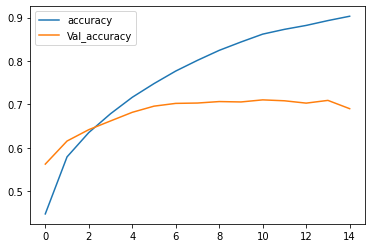

In [14]:
plt.plot(r.history['accuracy'],label ='accuracy')
plt.plot(r.history['val_accuracy'],label = 'Val_accuracy')
plt.legend()

In [0]:
#Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
import matplotlib.pyplot as plt

confusion matrix without normalization
[[714  21  31  11  15   4   6   7 128  63]
 [ 14 828   1   5   6   2   5   1  46  92]
 [ 83   8 577  66  64  69  49  42  19  23]
 [ 28  17  68 480  50 165  40  66  30  56]
 [ 25   5  91  55 603  49  31 105  23  13]
 [ 16   9  46 168  42 565  27  84  23  20]
 [ 11  23  49  84  43  43 696  13  14  24]
 [ 24   7  25  27  49  44   6 778   4  36]
 [ 38  36  13  10   8   3   2   4 857  29]
 [ 29  84   9   9   4   6   3  17  38 801]]


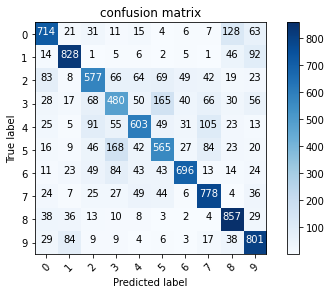

In [16]:
def plot_confusion_matrix(cm,classes,
                          normalize = False,
                          title = 'confusion matrix',
                          cmap =plt.cm.Blues):
  #This function print and plot the confusion matrix
  if normalize:
      cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('confusion matrix without normalization')
  print(cm)

  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation = 45)
  plt.yticks(tick_marks,classes)

  fmt ='.2f' if normalize else 'd'
  thresh = cm.max() / 2.

  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j],fmt),
               horizontalalignment='center',
               color = 'white' if cm[i,j] > thresh else 'black')
  plt.tight_layout()
  plt.ylabel("True label")
  plt.xlabel("Predicted label")
  plt.show()

p_test = model.predict(x_test).argmax(axis =1)
cm = confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))

In [0]:
#Label Mapping
labels = ''' airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck '''.split()

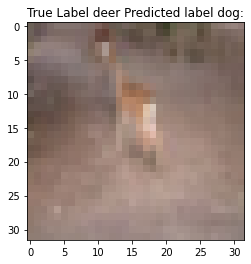

In [24]:
#Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i= np.random.choice(misclassified_idx)
plt.imshow(x_test[i])
plt.title("True Label %s Predicted label %s:"% (labels[y_test[i]],labels[p_test[i]]));